In [ ]:
import numpy as np
import pandas as pd

In [ ]:
transaction_list1= pd.read_csv("/content/i1.csv")
transaction_list2=pd.read_csv("/content/i2.csv")

In [ ]:
data = transaction_list1.merge(transaction_list2,how='outer')
data

,Date,Timestamp,Invoice No.,Item Name,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Server Name,Covers,Variation,Category,HSN
0,2023-09-19,2023-09-19 22:03:44,28389,Kulcha,55.0,1.0,55.0,0.0,2.76,57.76,16.0,biller,0,NaN,Indian Breads,NaN
1,2023-09-19,2023-09-19 22:03:44,28389,Parota,30.0,4.0,120.0,0.0,6.00,126.00,16.0,biller,0,NaN,Indian Breads,NaN
2,2023-09-19,2023-09-19 22:03:44,28389,Mushroom Masala,150.0,1.0,150.0,0.0,7.50,157.50,16.0,biller,0,NaN,Veg Gravy,NaN
3,2023-09-19,2023-09-19 22:03:44,28389,Paneer Butter Masala,150.0,1.0,150.0,0.0,7.50,157.50,16.0,biller,0,NaN,Veg Gravy,NaN
4,2023-09-19,2023-09-19 22:03:44,28389,Gobi- 65,120.0,1.0,120.0,0.0,6.00,126.00,16.0,biller,0,NaN,Veg Starters,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15616,2023-04-01,2023-04-01 13:16:03,23465,Paneer Butter Masala,150.0,2.0,300.0,0.0,15.00,315.00,20.0,biller,0,NaN,Veg Gravy,NaN
15617,2023-04-01,2023-04-01 13:16:03,23465,Schewan Chicken Fried Rice,160.0,1.0,160.0,0.0,8.00,168.00,20.0,biller,0,NaN,NON VEG BRIYANI & RICE,NaN
15618,2023-04-01,2023-04-01 13:16:03,23465,Schezwan Egg Fried Rice,140.0,1.0,140.0,0.0,7.00,147.00,20.0,biller,0,NaN,NON VEG BRIYANI & RICE,NaN
15619,2023-04-01,2023-04-01 13:16:03,23465,Chicken Kati Roll,120.0,1.0,120.0,0.0,6.00,126.00,20.0,biller,0,NaN,NON VEG STARTERS CHICKEN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15621 entries, 0 to 15620
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         15621 non-null  object 
 1   Timestamp    15621 non-null  object 
 2   Invoice No.  15621 non-null  int64  
 3   Item Name    15621 non-null  object 
 4   Price        15621 non-null  float64
 5   Qty.         15621 non-null  float64
 6   Sub Total    15621 non-null  float64
 7   Discount     15621 non-null  float64
 8   Tax          15621 non-null  float64
 9   Final Total  15621 non-null  float64
 10  Table No.    15613 non-null  float64
 11  Server Name  15621 non-null  object 
 12  Covers       15621 non-null  int64  
 13  Variation    15 non-null     object 
 14  Category     15621 non-null  object 
 15  HSN          0 non-null      float64
dtypes: float64(8), int64(2), object(6)
memory usage: 2.0+ MB


In [ ]:
data.isnull().sum()

Date               0
Timestamp          0
Invoice No.        0
Item Name          0
Price              0
Qty.               0
Sub Total          0
Discount           0
Tax                0
Final Total        0
Table No.          8
Server Name        0
Covers             0
Variation      15606
Category           0
HSN            15621
dtype: int64

In [ ]:
data=data.rename(columns={"Invoice No.":"Invoice No","Qty.":"Qty","Table No.":"Table_No"})

In [ ]:
data=data[data["Final Total"]>0]


data=data[data["Sub Total"]>0]


In [ ]:
data.drop(['Variation','HSN'],axis=1,inplace=True)

In [ ]:
data.isnull().sum()

Date           0
Timestamp      0
Invoice No     0
Item Name      0
Price          0
Qty            0
Sub Total      0
Discount       0
Tax            0
Final Total    0
Table_No       8
Server Name    0
Covers         0
Category       0
dtype: int64

In [ ]:
data['Date']=pd.to_datetime(data.Date,format='%Y-%m-%d')
data["Date"]

0       2023-09-19
1       2023-09-19
2       2023-09-19
3       2023-09-19
4       2023-09-19
           ...    
15616   2023-04-01
15617   2023-04-01
15618   2023-04-01
15619   2023-04-01
15620   2023-04-01
Name: Date, Length: 15621, dtype: datetime64[ns]

In [ ]:
cate=[]
for i in data.columns:
  if data[i].dtypes==object:
    cate.append(i)
print(cate)




['Timestamp', 'Item Name', 'Server Name', 'Category']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

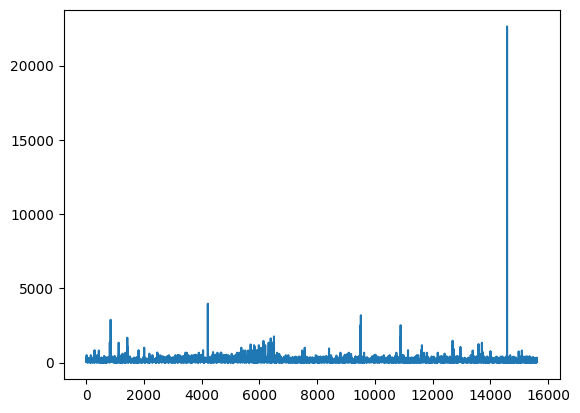

In [ ]:
x = data['Final Total']
plt.plot(x)

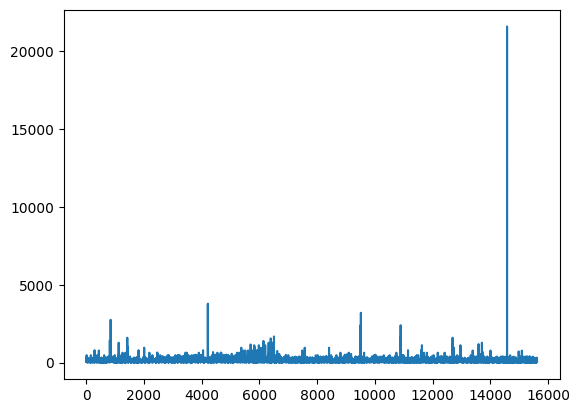

In [ ]:
y=data['Sub Total']
plt.plot(y)

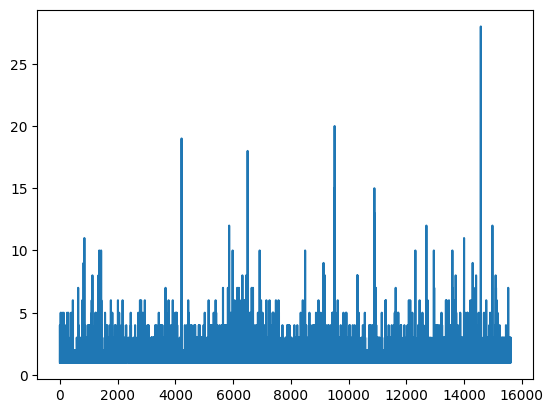

In [ ]:
z=data['Qty']
plt.plot(z)

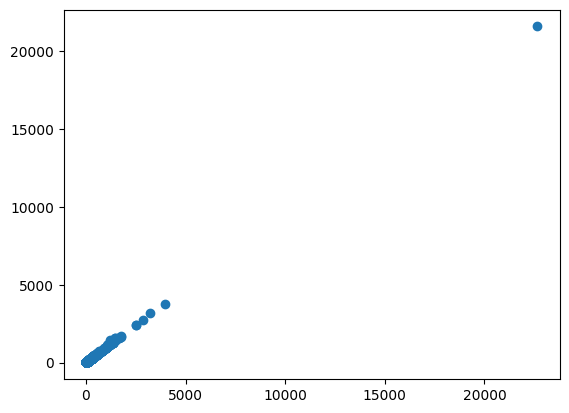

In [ ]:
a=data['Final Total']
b=data['Sub Total']
plt.scatter(a,b)

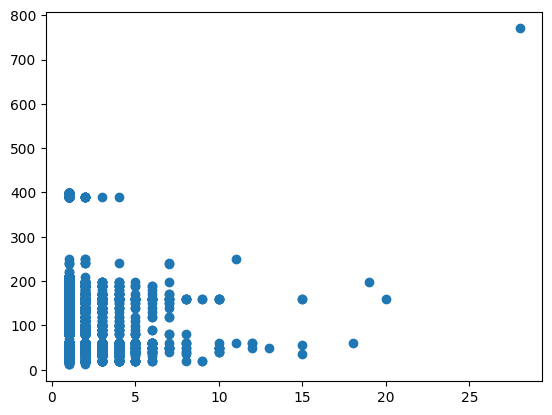

In [ ]:
x=data['Qty']
y=data['Price']
plt.scatter(x,y)

<BarContainer object of 15621 artists>

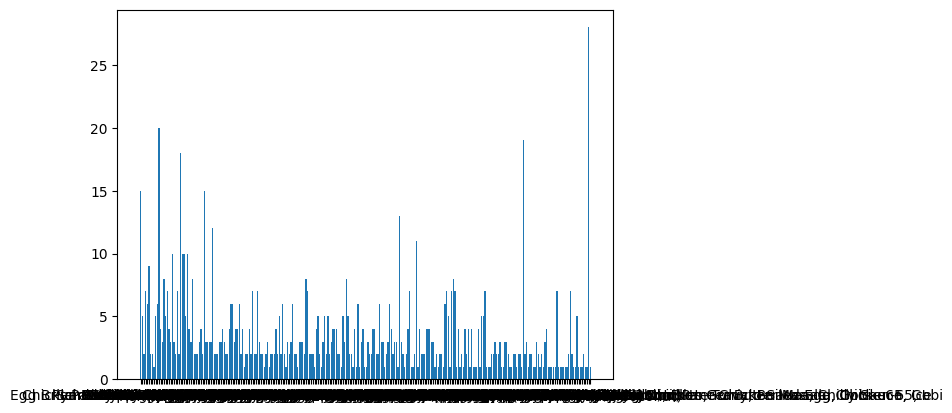

In [ ]:
a=data['Item Name']
b=data['Qty']


plt.bar(a,b)

Text(0, 0.5, 'Qty')

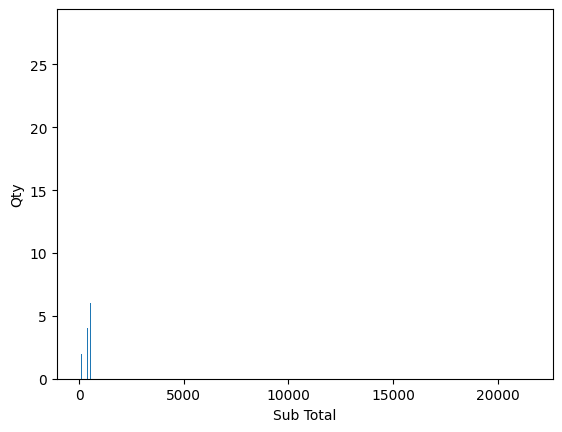

In [ ]:
x=data['Sub Total']
y=data['Qty']
plt.bar(x,y)
plt.xlabel('Sub Total')
plt.ylabel('Qty')

Text(0.5, 0, 'Sub Total')

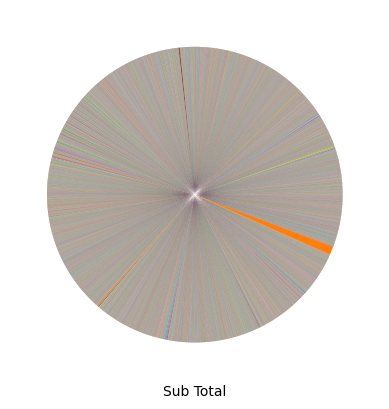

In [ ]:
x=data['Sub Total']
plt.pie(x)
plt.xlabel('Sub Total')

(array([1.5615e+04, 5.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.20000e+01, 2.16680e+03, 4.32160e+03, 6.47640e+03, 8.63120e+03,
        1.07860e+04, 1.29408e+04, 1.50956e+04, 1.72504e+04, 1.94052e+04,
        2.15600e+04]),
 <BarContainer object of 10 artists>)

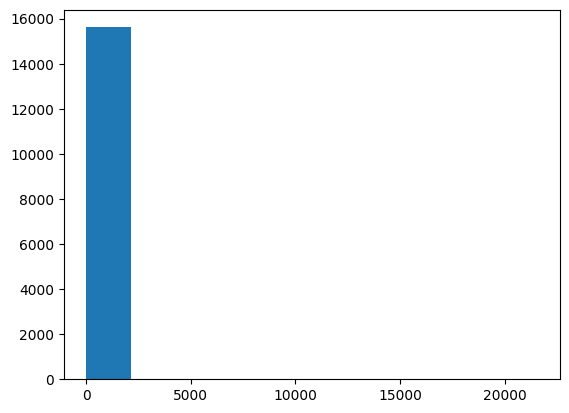

In [ ]:
a=data['Sub Total']
plt.hist(a)

Text(0.5, 0, 'Qty')

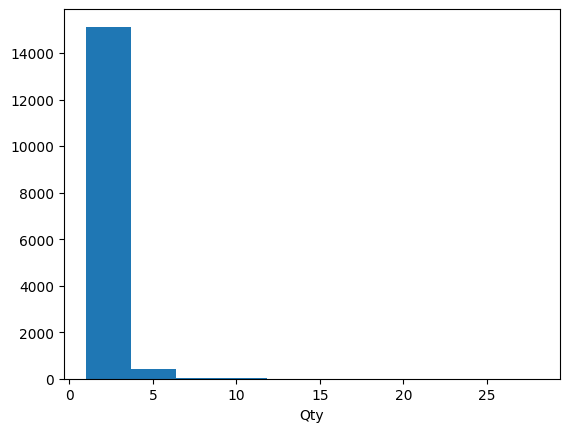

In [ ]:
b=data['Qty']
plt.hist(b)
plt.xlabel('Qty')

<Axes: ylabel='Final Total'>

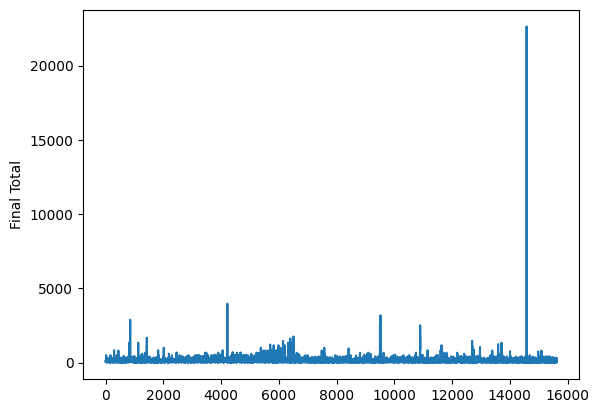

In [ ]:
#seaborn
x=data['Final Total']
sns.lineplot(x)

Text(0.5, 1.0, 'BARPLOT')

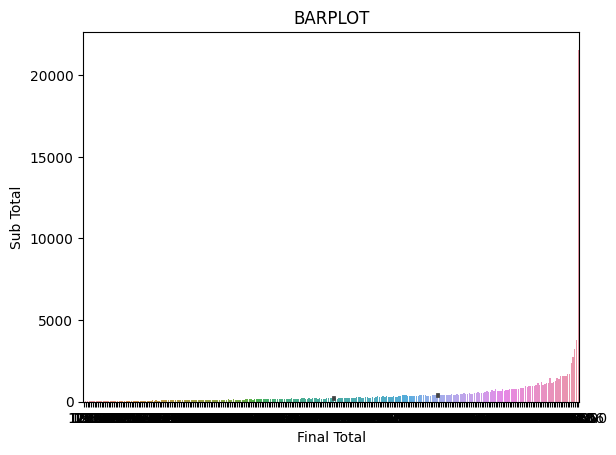

In [ ]:
sns.barplot(x='Final Total',y='Sub Total',data=data)
plt.title('BARPLOT')

In [ ]:
data.Qty.sum()

20914.0

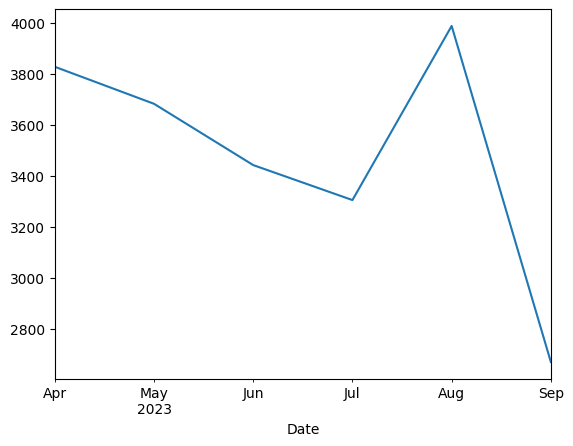

In [ ]:
data.copy().set_index('Date').Qty.resample('M').sum().plot();

In [ ]:
y=data.groupby(['Qty']).sum()
print(data)

            Date            Timestamp  Invoice No  \
0     2023-09-19  2023-09-19 22:03:44       28389   
1     2023-09-19  2023-09-19 22:03:44       28389   
2     2023-09-19  2023-09-19 22:03:44       28389   
3     2023-09-19  2023-09-19 22:03:44       28389   
4     2023-09-19  2023-09-19 22:03:44       28389   
...          ...                  ...         ...   
15616 2023-04-01  2023-04-01 13:16:03       23465   
15617 2023-04-01  2023-04-01 13:16:03       23465   
15618 2023-04-01  2023-04-01 13:16:03       23465   
15619 2023-04-01  2023-04-01 13:16:03       23465   
15620 2023-04-01  2023-04-01 13:16:03       23465   

                         Item Name  Price  Qty  Sub Total  Discount    Tax  \
0                           Kulcha   55.0  1.0       55.0       0.0   2.76   
1                           Parota   30.0  4.0      120.0       0.0   6.00   
2                  Mushroom Masala  150.0  1.0      150.0       0.0   7.50   
3             Paneer Butter Masala  150.0  1.0     

<ipython-input-27-b8685d3ee7f4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y=data.groupby(['Qty']).sum()


In [ ]:
x=data.groupby(['Final Total']).sum()
print(data)

            Date            Timestamp  Invoice No  \
0     2023-09-19  2023-09-19 22:03:44       28389   
1     2023-09-19  2023-09-19 22:03:44       28389   
2     2023-09-19  2023-09-19 22:03:44       28389   
3     2023-09-19  2023-09-19 22:03:44       28389   
4     2023-09-19  2023-09-19 22:03:44       28389   
...          ...                  ...         ...   
15616 2023-04-01  2023-04-01 13:16:03       23465   
15617 2023-04-01  2023-04-01 13:16:03       23465   
15618 2023-04-01  2023-04-01 13:16:03       23465   
15619 2023-04-01  2023-04-01 13:16:03       23465   
15620 2023-04-01  2023-04-01 13:16:03       23465   

                         Item Name  Price  Qty  Sub Total  Discount    Tax  \
0                           Kulcha   55.0  1.0       55.0       0.0   2.76   
1                           Parota   30.0  4.0      120.0       0.0   6.00   
2                  Mushroom Masala  150.0  1.0      150.0       0.0   7.50   
3             Paneer Butter Masala  150.0  1.0     

<ipython-input-28-421fd3efd0b1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x=data.groupby(['Final Total']).sum()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15621 entries, 0 to 15620
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         15621 non-null  datetime64[ns]
 1   Timestamp    15621 non-null  object        
 2   Invoice No   15621 non-null  int64         
 3   Item Name    15621 non-null  object        
 4   Price        15621 non-null  float64       
 5   Qty          15621 non-null  float64       
 6   Sub Total    15621 non-null  float64       
 7   Discount     15621 non-null  float64       
 8   Tax          15621 non-null  float64       
 9   Final Total  15621 non-null  float64       
 10  Table_No     15613 non-null  float64       
 11  Server Name  15621 non-null  object        
 12  Covers       15621 non-null  int64         
 13  Category     15621 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(2), object(4)
memory usage: 1.8+ MB


In [ ]:
data = transaction_list1.merge(transaction_list2,how='outer')
data

,Date,Timestamp,Invoice No.,Item Name,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Server Name,Covers,Variation,Category,HSN
0,2023-09-19,2023-09-19 22:03:44,28389,Kulcha,55.0,1.0,55.0,0.0,2.76,57.76,16.0,biller,0,NaN,Indian Breads,NaN
1,2023-09-19,2023-09-19 22:03:44,28389,Parota,30.0,4.0,120.0,0.0,6.00,126.00,16.0,biller,0,NaN,Indian Breads,NaN
2,2023-09-19,2023-09-19 22:03:44,28389,Mushroom Masala,150.0,1.0,150.0,0.0,7.50,157.50,16.0,biller,0,NaN,Veg Gravy,NaN
3,2023-09-19,2023-09-19 22:03:44,28389,Paneer Butter Masala,150.0,1.0,150.0,0.0,7.50,157.50,16.0,biller,0,NaN,Veg Gravy,NaN
4,2023-09-19,2023-09-19 22:03:44,28389,Gobi- 65,120.0,1.0,120.0,0.0,6.00,126.00,16.0,biller,0,NaN,Veg Starters,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15616,2023-04-01,2023-04-01 13:16:03,23465,Paneer Butter Masala,150.0,2.0,300.0,0.0,15.00,315.00,20.0,biller,0,NaN,Veg Gravy,NaN
15617,2023-04-01,2023-04-01 13:16:03,23465,Schewan Chicken Fried Rice,160.0,1.0,160.0,0.0,8.00,168.00,20.0,biller,0,NaN,NON VEG BRIYANI & RICE,NaN
15618,2023-04-01,2023-04-01 13:16:03,23465,Schezwan Egg Fried Rice,140.0,1.0,140.0,0.0,7.00,147.00,20.0,biller,0,NaN,NON VEG BRIYANI & RICE,NaN
15619,2023-04-01,2023-04-01 13:16:03,23465,Chicken Kati Roll,120.0,1.0,120.0,0.0,6.00,126.00,20.0,biller,0,NaN,NON VEG STARTERS CHICKEN,NaN


In [ ]:
data=data.rename(columns={"Invoice No.":"Invoice No","Qty.":"Qty","Table No.":"Table_No"})


In [ ]:
df=data.groupby('Invoice No').agg({'Qty':lambda x:x.sum()})
data

,Date,Timestamp,Invoice No,Item Name,Price,Qty,Sub Total,Discount,Tax,Final Total,Table_No,Server Name,Covers,Variation,Category,HSN
0,2023-09-19,2023-09-19 22:03:44,28389,Kulcha,55.0,1.0,55.0,0.0,2.76,57.76,16.0,biller,0,NaN,Indian Breads,NaN
1,2023-09-19,2023-09-19 22:03:44,28389,Parota,30.0,4.0,120.0,0.0,6.00,126.00,16.0,biller,0,NaN,Indian Breads,NaN
2,2023-09-19,2023-09-19 22:03:44,28389,Mushroom Masala,150.0,1.0,150.0,0.0,7.50,157.50,16.0,biller,0,NaN,Veg Gravy,NaN
3,2023-09-19,2023-09-19 22:03:44,28389,Paneer Butter Masala,150.0,1.0,150.0,0.0,7.50,157.50,16.0,biller,0,NaN,Veg Gravy,NaN
4,2023-09-19,2023-09-19 22:03:44,28389,Gobi- 65,120.0,1.0,120.0,0.0,6.00,126.00,16.0,biller,0,NaN,Veg Starters,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15616,2023-04-01,2023-04-01 13:16:03,23465,Paneer Butter Masala,150.0,2.0,300.0,0.0,15.00,315.00,20.0,biller,0,NaN,Veg Gravy,NaN
15617,2023-04-01,2023-04-01 13:16:03,23465,Schewan Chicken Fried Rice,160.0,1.0,160.0,0.0,8.00,168.00,20.0,biller,0,NaN,NON VEG BRIYANI & RICE,NaN
15618,2023-04-01,2023-04-01 13:16:03,23465,Schezwan Egg Fried Rice,140.0,1.0,140.0,0.0,7.00,147.00,20.0,biller,0,NaN,NON VEG BRIYANI & RICE,NaN
15619,2023-04-01,2023-04-01 13:16:03,23465,Chicken Kati Roll,120.0,1.0,120.0,0.0,6.00,126.00,20.0,biller,0,NaN,NON VEG STARTERS CHICKEN,NaN


In [ ]:
a=data.groupby('Invoice No').agg({'Qty':lambda x:x.sum(),
                                   'Sub Total':lambda x:x.sum()})

Text(0.5, 1.0, 'HISTPLOT')

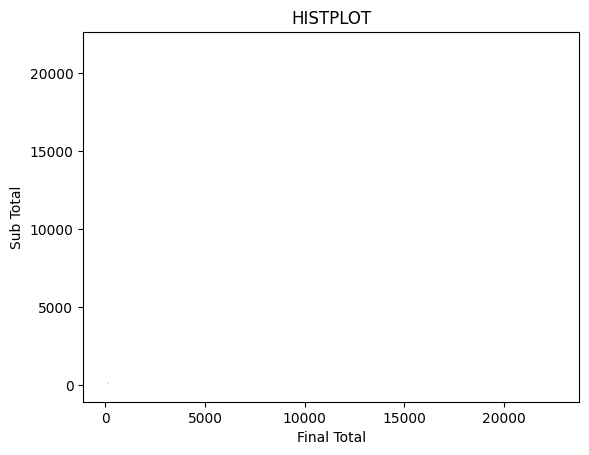

In [ ]:
sns.histplot(x='Final Total',y='Sub Total',data=data)
plt.title('HISTPLOT')

<ipython-input-35-e5f0853f6352>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y=data.groupby('Item Name').sum().sort_values('Qty',ascending=False)[['Qty']][0:25]


<Axes: xlabel='Qty', ylabel='Item Name'>

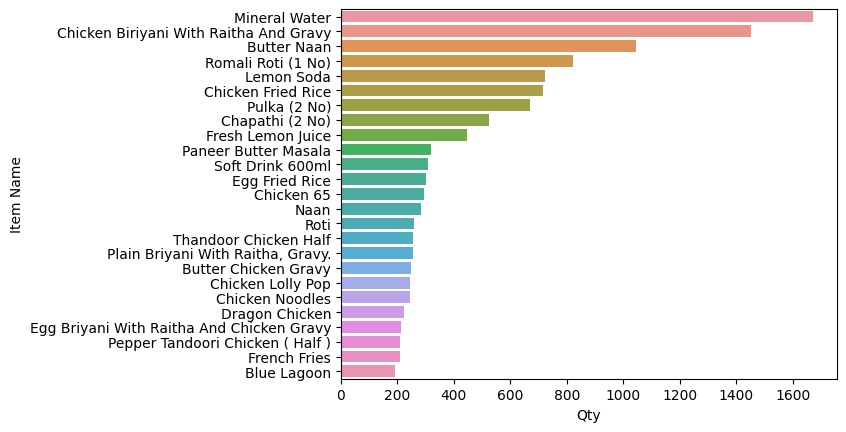

In [ ]:
y=data.groupby('Item Name').sum().sort_values('Qty',ascending=False)[['Qty']][0:25]
sns.barplot(x='Qty',y=y.index,data=y)





<ipython-input-36-90afbda5208d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y=data.groupby('Item Name').sum().sort_values('Qty',ascending=False)[['Qty']][0:25]


<Axes: xlabel='Qty', ylabel='Item Name'>

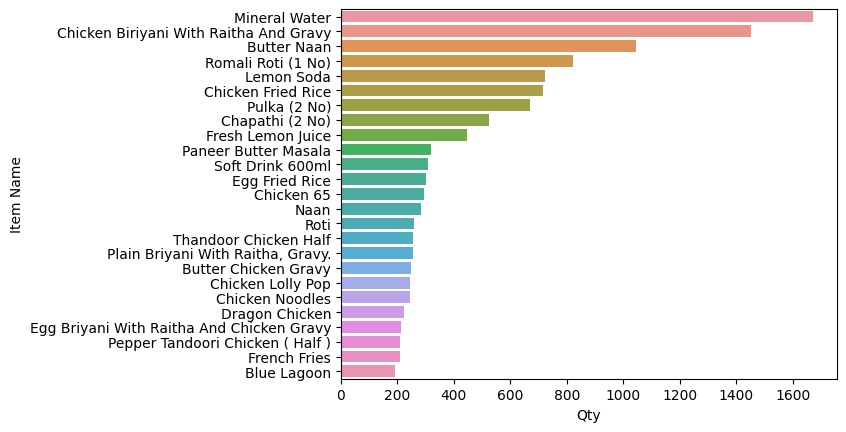

In [ ]:
x=data['Qty']
y=data.groupby('Item Name').sum().sort_values('Qty',ascending=False)[['Qty']][0:25]
sns.barplot(x='Qty',y=y.index,data=y)

<ipython-input-37-f1d0e3c2dba4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  b=data.groupby('Item Name').sum().sort_values('Final Total',ascending=False)[['Final Total']][0:25]


<Axes: xlabel='Final Total', ylabel='Item Name'>

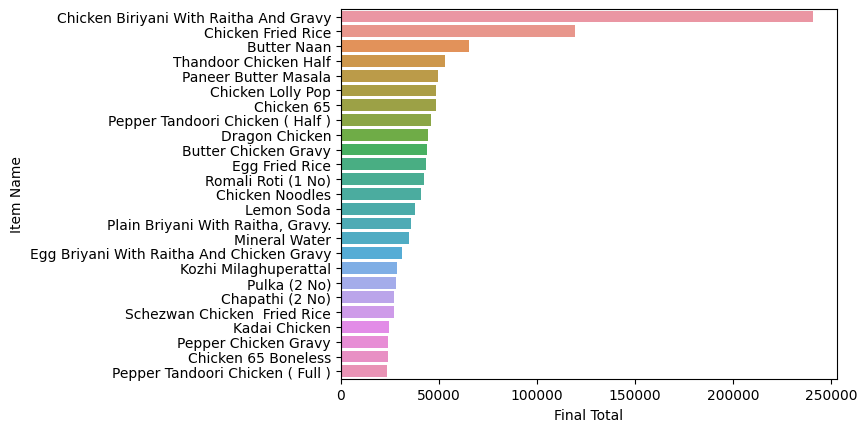

In [ ]:
a=('Final Total')
b=data.groupby('Item Name').sum().sort_values('Final Total',ascending=False)[['Final Total']][0:25]
sns.barplot(x=a,y=b.index,data=b)

<ipython-input-38-22c065ad985f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  n=data.groupby('Item Name').sum().sort_values('Tax',ascending=False)[['Tax']][0:25]


<Axes: xlabel='Tax', ylabel='Item Name'>

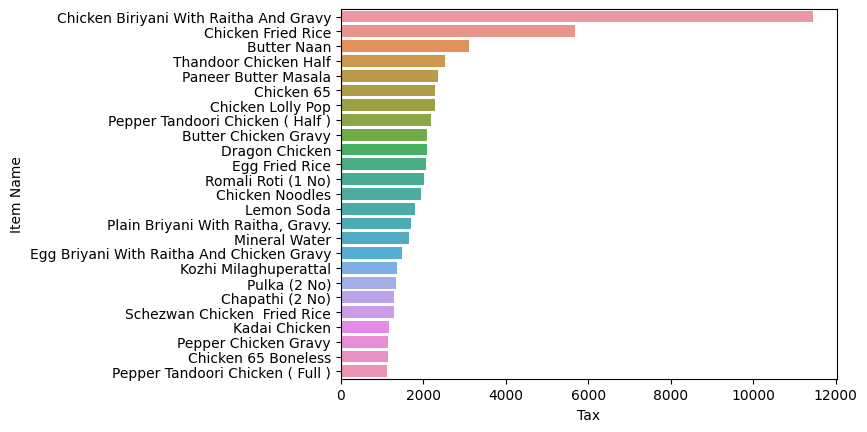

In [ ]:
m=('Tax')
n=data.groupby('Item Name').sum().sort_values('Tax',ascending=False)[['Tax']][0:25]
sns.barplot(x=m,y=n.index,data=n)

<ipython-input-39-d63d0f0581e5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  q=data.groupby('Item Name').sum().sort_values('Qty',ascending=False)[['Qty','Price','Final Total']][0:25]


<Axes: xlabel='Qty', ylabel='Item Name'>

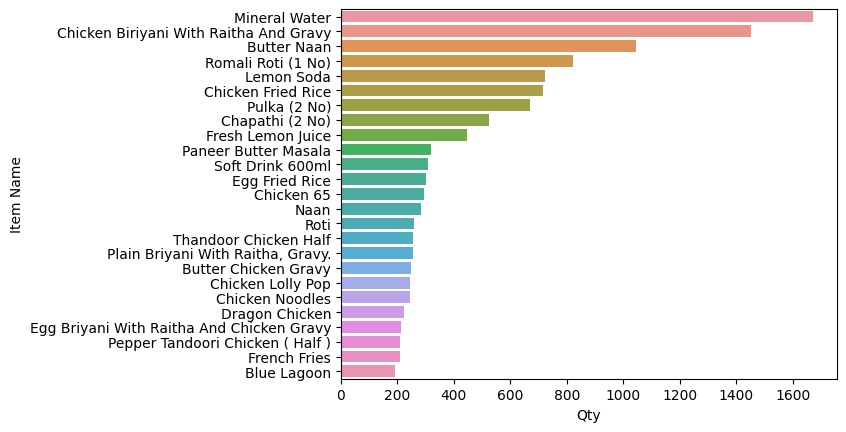

In [ ]:
p=('Qty')
q=data.groupby('Item Name').sum().sort_values('Qty',ascending=False)[['Qty','Price','Final Total']][0:25]
sns.barplot(x=p,y=q.index,data=q)

<ipython-input-40-5262fc0805c4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  e=data.groupby('Date').sum().sort_values('Price',ascending=False)[['Price']][0:25]


<Axes: xlabel='Date', ylabel='Price'>

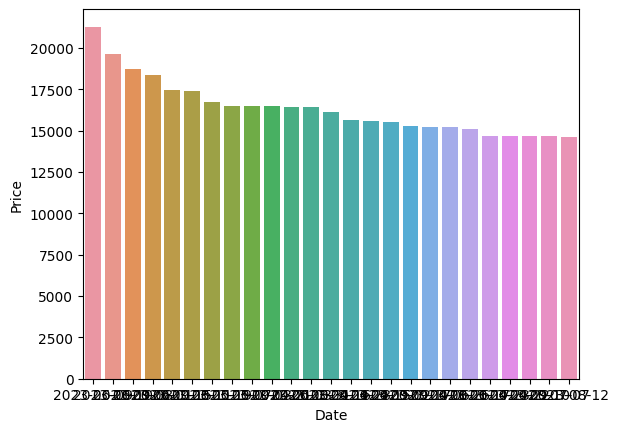

In [ ]:
w=('Price')
e=data.groupby('Date').sum().sort_values('Price',ascending=False)[['Price']][0:25]
sns.barplot(x=e.index,y=w,data=e)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15621 entries, 0 to 15620
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         15621 non-null  object 
 1   Timestamp    15621 non-null  object 
 2   Invoice No   15621 non-null  int64  
 3   Item Name    15621 non-null  object 
 4   Price        15621 non-null  float64
 5   Qty          15621 non-null  float64
 6   Sub Total    15621 non-null  float64
 7   Discount     15621 non-null  float64
 8   Tax          15621 non-null  float64
 9   Final Total  15621 non-null  float64
 10  Table_No     15613 non-null  float64
 11  Server Name  15621 non-null  object 
 12  Covers       15621 non-null  int64  
 13  Variation    15 non-null     object 
 14  Category     15621 non-null  object 
 15  HSN          0 non-null      float64
dtypes: float64(8), int64(2), object(6)
memory usage: 2.0+ MB


<ipython-input-42-909f07782a22>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


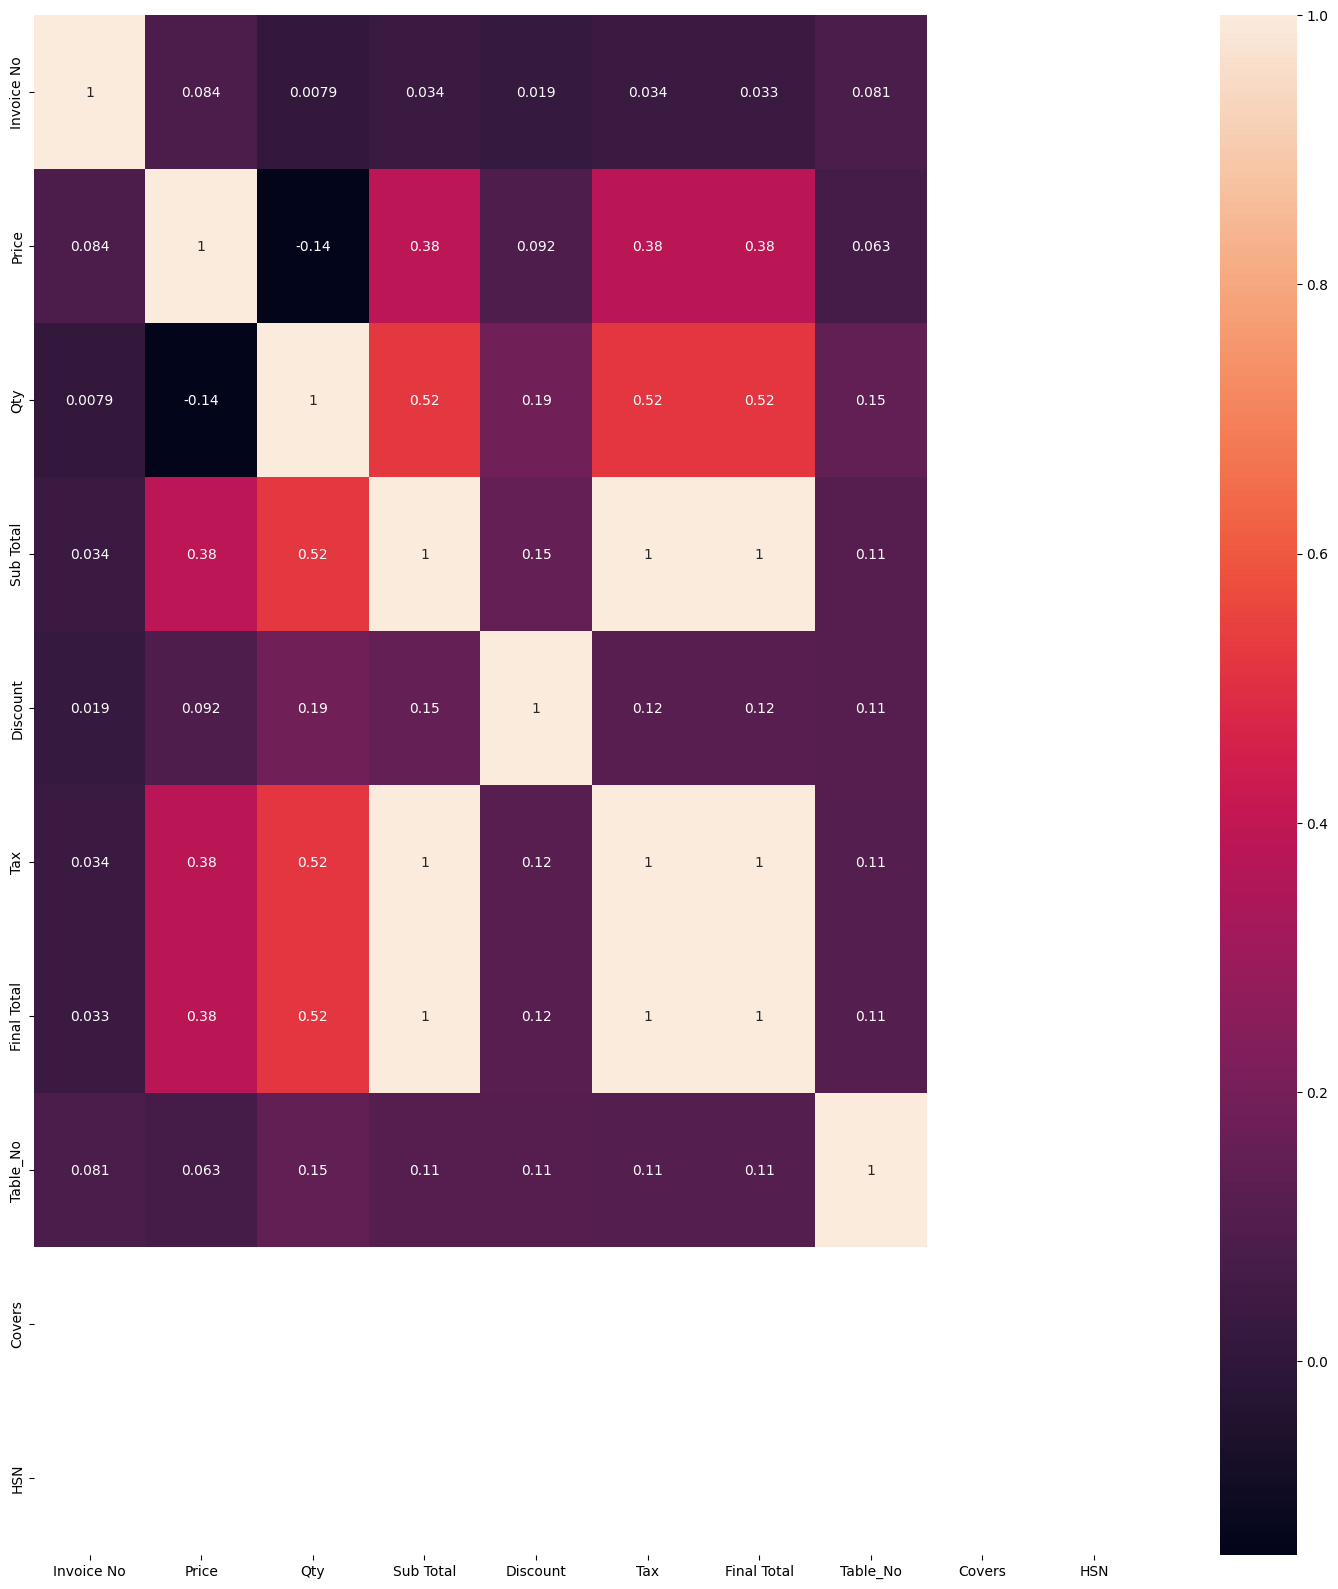

In [ ]:
plt.figure(figsize=(18,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
corr_data=data.corr()
corr_data.abs().unstack().sort_values(ascending=False)[0:50:2]


<ipython-input-43-7ffeaa28efec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data=data.corr()


Invoice No   Invoice No     1.000000
Final Total  Final Total    1.000000
Discount     Discount       1.000000
Qty          Qty            1.000000
Final Total  Tax            0.999821
Sub Total    Final Total    0.999505
             Tax            0.999312
             Qty            0.522928
Qty          Final Total    0.519166
             Tax            0.519150
Price        Sub Total      0.384257
             Final Total    0.382996
             Tax            0.382686
Discount     Qty            0.189749
Sub Total    Discount       0.152073
Qty          Table_No       0.146062
             Price          0.144109
Tax          Discount       0.121015
Final Total  Discount       0.120923
Table_No     Discount       0.114728
             Sub Total      0.111837
             Tax            0.108679
Final Total  Table_No       0.108673
Discount     Price          0.091730
Price        Invoice No     0.084047
dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_Encoder = LabelEncoder()
for i in cate:
  data[i]=data[[i]].apply(label_Encoder.fit_transform)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15621 entries, 0 to 15620
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         15621 non-null  object 
 1   Timestamp    15621 non-null  int64  
 2   Invoice No   15621 non-null  int64  
 3   Item Name    15621 non-null  int64  
 4   Price        15621 non-null  float64
 5   Qty          15621 non-null  float64
 6   Sub Total    15621 non-null  float64
 7   Discount     15621 non-null  float64
 8   Tax          15621 non-null  float64
 9   Final Total  15621 non-null  float64
 10  Table_No     15613 non-null  float64
 11  Server Name  15621 non-null  int64  
 12  Covers       15621 non-null  int64  
 13  Variation    15 non-null     object 
 14  Category     15621 non-null  int64  
 15  HSN          0 non-null      float64
dtypes: float64(8), int64(6), object(2)
memory usage: 2.0+ MB
